# Exp 4: Image Compression #
## 1.	Aims ##

#### 1. Be familiar with some basic image fidelity assessment methods such as MSE, PSNR and SSIM.

#### 2. Be familiar with the process of JPEG compression.
    
#### 3. Be familiar with Discrete Cosine Transform, Huffman Coding, and Predictive Coding.

## 2.	Steps and Requirements

### (1) Compression Ratio and Relative Coding Redundancy
(a) Load the image bunny.png. Save it as a JPEG image with a quality factor of 90, 60, 10, respectively. Name the images as b90.jpg, b60.jpg, b10.jpg, respectively. 

(b) Display the original image and the compressed images.

(c) Calculate the *Compression Ratio* and *Relative Data Redundancy* between the PNG image and JPEG images according to the file sizes. (Tips: ``os.path.getsize``)

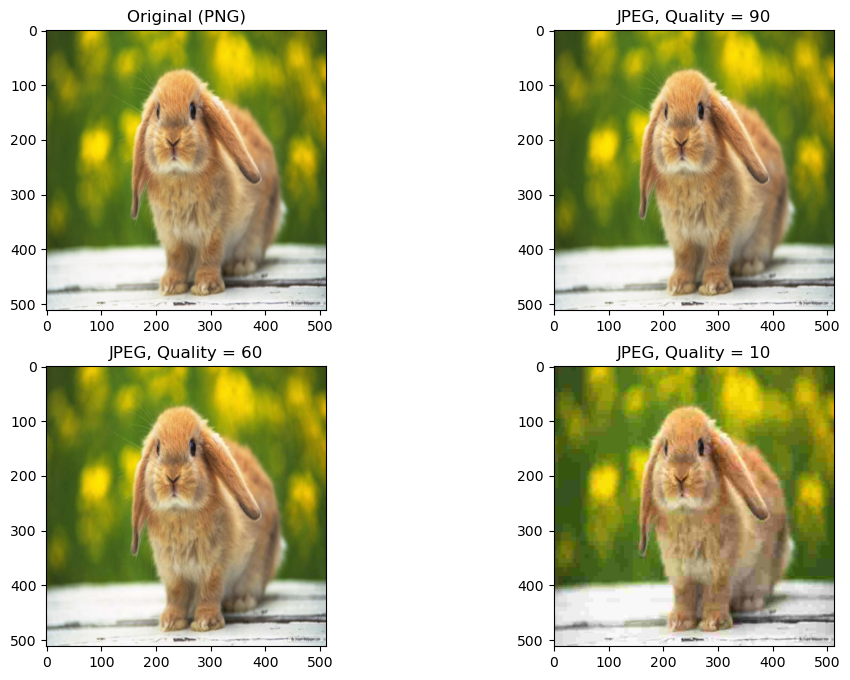

PNG file size: 383655 bytes
JPEG (quality=90) file size: 44639 bytes
JPEG (quality=60) file size: 19673 bytes
JPEG (quality=10) file size: 5648 bytes
Compression Ratio (PNG vs JPEG 90): 8.59
Compression Ratio (PNG vs JPEG 60): 19.50
Compression Ratio (PNG vs JPEG 10): 67.93
Relative Data Redundancy (PNG vs JPEG 90): 88.36%
Relative Data Redundancy (PNG vs JPEG 60): 94.87%
Relative Data Redundancy (PNG vs JPEG 10): 98.53%


In [62]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.io import imread
import cv2
from scipy.fftpack import dct
import scipy
from zipfile import ZipFile
import zipfile
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
from scipy.fftpack import idct

# (a) Load the image bunny.png and save it as JPEG with different quality factors
image = Image.open('images/bunny.png')

image.save('b90.jpg', optimize=True, quality=90)
image.save('b60.jpg', optimize=True, quality=60)
image.save('b10.jpg', optimize=True, quality=10)


# (b) Display the original image and the compressed images
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(Image.open('images/bunny.png'), cmap='gray')
axes[0, 0].set_title('Original (PNG)')

axes[0, 1].imshow(Image.open('b90.jpg'), cmap='gray')
axes[0, 1].set_title('JPEG, Quality = 90')

axes[1, 0].imshow(Image.open('b60.jpg'), cmap='gray')
axes[1, 0].set_title('JPEG, Quality = 60')

axes[1, 1].imshow(Image.open('b10.jpg'), cmap='gray')
axes[1, 1].set_title('JPEG, Quality = 10')

plt.show()

# (c) Calculate the Compression Ratio and Relative Data Redundancy
png_size = os.path.getsize('images/bunny.png')
jpg90_size = os.path.getsize('b90.jpg')
jpg60_size = os.path.getsize('b60.jpg')
jpg10_size = os.path.getsize('b10.jpg')

print(f"PNG file size: {png_size} bytes")
print(f"JPEG (quality=90) file size: {jpeg90_size} bytes")
print(f"JPEG (quality=60) file size: {jpeg60_size} bytes")
print(f"JPEG (quality=10) file size: {jpeg10_size} bytes")

print(f"Compression Ratio (PNG vs JPEG 90): {png_size / jpeg90_size:.2f}")
print(f"Compression Ratio (PNG vs JPEG 60): {png_size / jpeg60_size:.2f}")
print(f"Compression Ratio (PNG vs JPEG 10): {png_size / jpeg10_size:.2f}")

print(f"Relative Data Redundancy (PNG vs JPEG 90): {(png_size - jpeg90_size) / png_size * 100:.2f}%")
print(f"Relative Data Redundancy (PNG vs JPEG 60): {(png_size - jpeg60_size) / png_size * 100:.2f}%")
print(f"Relative Data Redundancy (PNG vs JPEG 10): {(png_size - jpeg10_size) / png_size * 100:.2f}%")

 ### (2) Fidelity Criteria 
(a) Load the saved JPEG images. Use functions from ``skimage.metrics`` to calculate MSE, PSNR, and SSIM values between the PNG image and JPEG images. 

(b) Implement a SSIM function by yourself according to [1].

[1] Wang Z, Bovik AC, Sheikh HR, Simoncelli EP. Image quality assessment: from error visibility to structural similarity. IEEE Trans Image Process. 2004 Apr;13(4):600-12.

In [66]:
# Load the images
png_img = imread('images/bunny.png')
jpg90_img = imread('b90.jpg')
jpg60_img = imread('b60.jpg')
jpg10_img = imread('b10.jpg')

# Calculate MSE, PSNR, and SSIM
# calculate MSE
mse_90 = mean_squared_error(png_img, jpg90_img)
mse_60 = mean_squared_error(png_img, jpg60_img)
mse_10 = mean_squared_error(png_img, jpg10_img)

# calculate PSNR
psnr_90 = peak_signal_noise_ratio(png_img, jpg90_img)
psnr_60 = peak_signal_noise_ratio(png_img, jpg60_img)
psnr_10 = peak_signal_noise_ratio(png_img, jpg10_img)

# calculate SSIM by skimage
ssim_90 = structural_similarity(png_img, jpg90_img, win_size=5, multichannel=True, channel_axis=-1)
ssim_60 = structural_similarity(png_img, jpg60_img, win_size=5, multichannel=True, channel_axis=-1)
ssim_10 = structural_similarity(png_img, jpg10_img, win_size=5, multichannel=True, channel_axis=-1)

# calculate SSIM by myself

# Define a function to calculate SSIM

def ssim_index(img1, img2):
    C1 = (0.01 * 255) ** 2
    C2 = (0.03 * 255) ** 2

    # Convert the image to float to avoid integer overflow in subsequent calculations
    img1 = np.float32(img1)
    img2 = np.float32(img2)

    # Calculate the mean of the two images
    mu1 = cv2.blur(img1, (11, 11))
    mu2 = cv2.blur(img2, (11, 11))

    # Calculate the variance of the two images
    sigma1_sq = cv2.blur(img1**2, (11, 11)) - mu1**2
    sigma2_sq = cv2.blur(img2**2, (11, 11)) - mu2**2
    sigma12 = cv2.blur(img1*img2, (11, 11)) - mu1*mu2

    # Calculate the numerator and denominator of SSIM
    ssim_map = ((2 * mu1 * mu2 + C1) * (2 * sigma12 + C2)) / ((mu1**2 + mu2**2 + C1) * (sigma1_sq + sigma2_sq + C2))
    return ssim_map

def calculate_ssim(img1, img2):
    # Calculate the SSIM index for both images
    ssim_value = ssim_index(img1, img2).mean()
    return ssim_value

# Calculating the SSIM value
ssim_90_m = calculate_ssim(png_img, jpg90_img)
ssim_60_m = calculate_ssim(png_img, jpg60_img)
ssim_10_m = calculate_ssim(png_img, jpg10_img)

# print result
print("JPEG Quality 90:")
print(f"  MSE: {mse_90:.4f}")
print(f"  PSNR: {psnr_90:.4f}")
print(f"  SSIM by skimage: {ssim_90:.4f}")
print(f"  SSIM by myself: {ssim_90_m:.4f}")

print("\nJPEG Quality 60:")
print(f"  MSE: {mse_60:.4f}")
print(f"  PSNR: {psnr_60:.4f}")
print(f"  SSIM by skimage: {ssim_60:.4f}")
print(f"  SSIM by myself: {ssim_60_m:.4f}")

print("\nJPEG Quality 10:")
print(f"  MSE: {mse_10:.4f}")
print(f"  PSNR: {psnr_10:.4f}")
print(f"  SSIM by skimage: {ssim_10:.4f}")
print(f"  SSIM by myself: {ssim_10_m:.4f}")

JPEG Quality 90:
  MSE: 3.2206
  PSNR: 43.0514
  SSIM by skimage: 0.9766
  SSIM by myself: 0.9822

JPEG Quality 60:
  MSE: 9.5234
  PSNR: 38.3429
  SSIM by skimage: 0.9471
  SSIM by myself: 0.9554

JPEG Quality 10:
  MSE: 65.0148
  PSNR: 30.0007
  SSIM by skimage: 0.8076
  SSIM by myself: 0.8063


### (3) Simulation of a Part of JPEG Compression
(a) Load the grayscale image lenagray.tiff.

(b) Shift the pixel intensity by -128. 

(c) Divide the image into non-overlapped 8$*$8 subimages and perform 8$*$8 block DCT on each subimage. (Tips: ``cv2.dct`` or ``scipy.fftpack.dct``)

(d) Use a quantization table with QF=50 for quantization. 

(e) Perform lossless predictive coding (difference coding) of DC coefficients by using the coefficient in the previous subimage as reference (a raster scan mannar).  

(f) Sort 63 AC coefficients in each block in a ZigZag order. Converted them into a one-dimensional vector. 

(g) Save all the compressed data into a Numpy data format (refered to as NPY/NPZ (.npy or .npz) file)  (Tips: ``np.save`` or ``np.savez``).

(h) Compress the npy/npz file to a zip file (refered to as NPZzip). Compress the TIFF image to another zip file (refered to as TIFFzip) (Tips: ``zipfile.Zipfile``, ``zipfile.write``, ``zipfile.close``. For more details please refer to https://docs.python.org/3/library/zipfile.html and https://cloud.tencent.com/developer/article/1431438).

(i) Calculate the Compression Ratio between the TIFF image and the NPY/NPZ file according to the file sizes. Calculate the Compression Ratio between the TIFF image and the NPZzip file according to the file sizes. Calculate the Compression Ratio between the TIFFZzip and the NPZzip according to the file sizes.

(j) Load the above saved file. Decode it to a recovered image.

(k) Compute the MSE and PSNR of the recovered image, and display it with the original image side by side.

``quantization_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
[12, 12,14, 19, 26, 58, 60, 55],
[14, 13, 16, 24, 40, 57, 69, 56],
[14, 17, 22, 29, 51, 87, 80, 62],
[18, 22, 37, 56, 68, 109, 103, 77],
[24, 35, 55, 64, 81, 104, 113, 92],
[49, 64, 78, 87, 103, 121, 120, 101],
[72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.float32)``

Compression ratio of TIFF to NPY: 3.05
Compression ratio of TIFF to NPZ: 3.04
Compression ratio of TIFFzip to NPZzip: 1.52
MSE: 80.06
PSNR: 29.10 dB


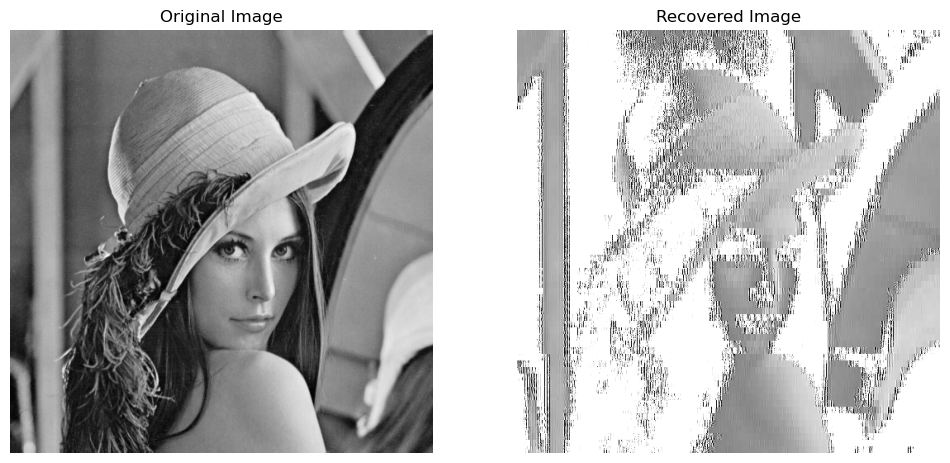

In [67]:

# (a) Load the grayscale image lenagray.tiff
image = cv2.imread('images/lenagray.tiff', cv2.IMREAD_GRAYSCALE)

# (b) Shift the pixel intensity by -128
shifted_image = image - 128

# (c) Divide the image into non-overlapped 8x8 subimages and perform 8x8 block DCT on each subimage
h, w = shifted_image.shape
dct_blocks = []
for i in range(0, h, 8):
    for j in range(0, w, 8):
        subimage = shifted_image[i:i+8, j:j+8]
        dct_block = dct(dct(subimage.T, norm='ortho').T, norm='ortho')
        dct_blocks.append(dct_block)

dct_blocks = np.array(dct_blocks)

# (d) Use a quantization table with QF=50 for quantization
quantization_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                              [12, 12, 14, 19, 26, 58, 60, 55],
                              [14, 13, 16, 24, 40, 57, 69, 56],
                              [14, 17, 22, 29, 51, 87, 80, 62],
                              [18, 22, 37, 56, 68, 109, 103, 77],
                              [24, 35, 55, 64, 81, 104, 113, 92],
                              [49, 64, 78, 87, 103, 121, 120, 101],
                              [72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.float32)

quantized_blocks = np.clip(np.round(dct_blocks / quantization_table), -128, 127).astype(np.int8)

# (e) Perform lossless predictive coding (difference coding) of DC coefficients 
# by using the coefficient in the previous subimage as reference (a raster scan mannar)
dc_coefficients = quantized_blocks[:, 0, 0]
predicted_dc = 0
encoded_dc_coefficients = [dc_coefficients[0]]
for i in range(1, len(dc_coefficients)):
    diff = dc_coefficients[i] - predicted_dc
    encoded_dc_coefficients.append(diff)
    predicted_dc = dc_coefficients[i]

# (f) Sort 63 AC coefficients in each block in a ZigZag order and convert them into a 1D vector
zigzag_indices = [0, 1, 8, 16, 9, 2, 3, 10, 17, 24, 32, 25, 18, 11, 4, 5, 12, 19, 26, 33, 40, 48, 
                  41, 34, 27, 20, 13, 6, 7, 14, 21, 28, 35, 42, 49, 56, 57, 50, 43, 36, 29, 22, 15, 
                  23, 30, 37, 44, 51, 58, 59, 52, 45, 38, 31, 39, 46, 53, 60, 61, 54, 47, 55, 62]
zigzag_encoded_coefficients = []
for block in quantized_blocks:
    zigzag_block = block.flatten()[zigzag_indices]
    zigzag_encoded_coefficients.append(zigzag_block)

zigzag_encoded_coefficients = np.array(zigzag_encoded_coefficients)

# (g) Save the compressed data in Numpy data format
np.save('compressed_data.npy', zigzag_encoded_coefficients)
np.savez('compressed_data.npz', compressed_data=zigzag_encoded_coefficients)

# (h) Compress the Numpy data and TIFF image into zip files
with zipfile.ZipFile('NPZzip.zip', 'w') as npz_zip:
    npz_zip.write('compressed_data.npy')
    npz_zip.write('compressed_data.npz')

with zipfile.ZipFile('TIFFzip.zip', 'w') as tiff_zip:
    tiff_zip.write('images/RGBimageB.tiff')

# (i) Calculate the compression ratios
tiff_size = os.path.getsize('images/RGBimageB.tiff')
npy_size = os.path.getsize('compressed_data.npy')
npz_size = os.path.getsize('compressed_data.npz')
tiffzip_size = os.path.getsize('TIFFzip.zip')
npzzip_size = os.path.getsize('NPZzip.zip')

tiff_npy_ratio = tiff_size / npy_size
tiff_npz_ratio = tiff_size / npz_size
tiffzip_npzzip_ratio = tiffzip_size / npzzip_size

print(f"Compression ratio of TIFF to NPY: {tiff_npy_ratio:.2f}")
print(f"Compression ratio of TIFF to NPZ: {tiff_npz_ratio:.2f}")
print(f"Compression ratio of TIFFzip to NPZzip: {tiffzip_npzzip_ratio:.2f}")

# (j) Load the above saved file and decode it to a recovered image
compressed_data = np.load('compressed_data.npy')

# Dequantize the compressed data
quantization_table_tiled = np.repeat(quantization_table[np.newaxis, :, :], 4096, axis=0)
dequantized_blocks = np.zeros((4096, 8, 8), dtype=np.float32)
for i in range(4096):
    for j in range(8):
        for k in range(8):
            index = j * 8 + k
            if index < 63:
                dequantized_blocks[i, j, k] = compressed_data[i, index] * quantization_table_tiled[i, j, k]

# Reconstruct the image by reversing the DCT and unpacking the blocks
h, w = shifted_image.shape
recovered_image = np.zeros_like(shifted_image, dtype=np.float32)
for i in range(0, h, 8):
    for j in range(0, w, 8):
        block_idx = (i // 8) * (w // 8) + (j // 8)
        block = dequantized_blocks[block_idx]
        block = idct(idct(block.T, norm='ortho').T, norm='ortho')
        recovered_image[i:i+8, j:j+8] = block

# Undo the pixel intensity shift
recovered_image = recovered_image + 128
recovered_image = np.clip(recovered_image, 0, 255).astype(np.uint8)

# (k) Compute the MSE and PSNR of the recovered image, and display it with the original image side by side
# Compute MSE and PSNR
mse = np.mean((image - recovered_image) ** 2)
psnr = 20 * np.log10(255 / np.sqrt(mse))

print(f"MSE: {mse:.2f}")
print(f"PSNR: {psnr:.2f} dB")

# Display the original and recovered images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(recovered_image, cmap='gray')
ax[1].set_title('Recovered Image')
ax[1].axis('off')

plt.show()

## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.